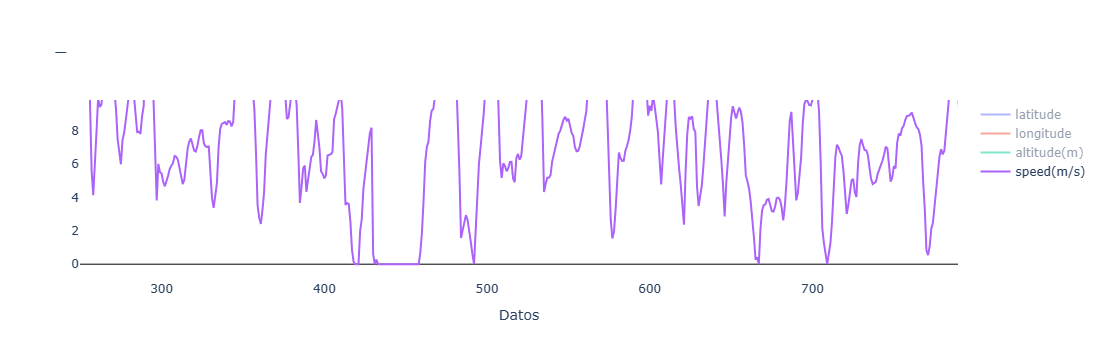

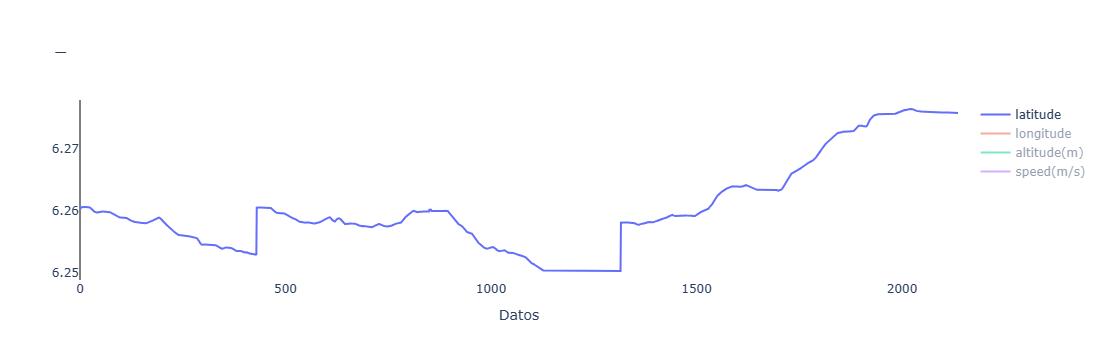

In [47]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.signal import savgol_filter

# Función para obtener la altitud a partir de las coordenadas GPS
import requests
def get_altitude(lat, lon):
    url = f"https://api.open-elevation.com/api/v1/lookup?locations={lat},{lon}" # URL del servicio de altitud (Open-Elevation) 
    try:
        response = requests.get(url)
        data = response.json()
        altitude = data["results"][0]["elevation"]
        return altitude
    except Exception as e:
        print(f"Error al obtener la altitud: {e}")
        return None # celda vacia 


C = "26"


Travel_driver = pd.read_excel ("Consolidado_Conductor_" + C + ".xlsx")
Travel_driver.columns

#GPS altimetria
fig = go.Figure(data=[go.Scatter(y = Travel_driver['latitude'], name = "latitude", mode="lines"),
                      go.Scatter(y = Travel_driver["longitude"], name = "longitude", mode="lines", visible = "legendonly"),
                      go.Scatter(y = Travel_driver["altitude(m)"], name = "altitude(m)", mode="lines", visible = "legendonly"),
                      go.Scatter(y = Travel_driver["speed(m/s)"], name = "speed(m/s)", mode="lines", visible = "legendonly")])

fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='black', title_text="Datos")
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='black', title_text="")
fig.update_layout(height=300, width=700, title_text="_",plot_bgcolor="white")
fig.show()

#GPS altimetria
fig = go.Figure(data=[go.Scatter(y = Travel_driver['latitude'], name = "latitude", mode="lines"),
                      go.Scatter(y = Travel_driver["longitude"], name = "longitude", mode="lines", visible = "legendonly"),
                      go.Scatter(y = Travel_driver["altitude(m)"], name = "altitude(m)", mode="lines", visible = "legendonly"),
                      go.Scatter(y = Travel_driver["speed(m/s)"], name = "speed(m/s)", mode="lines", visible = "legendonly")])

fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='black', title_text="Datos")
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='black', title_text="")
fig.update_layout(height=300, width=700, title_text="_",plot_bgcolor="white")
fig.show()

In [66]:
Travel_1 = Travel_driver.iloc[0:432]
Travel_1 ["Travel"] = 1

Travel_2 = Travel_driver.iloc[434:1141]
Travel_2 ["Travel"] = 2

Travel_3 = Travel_driver.iloc[1317:2141]
Travel_3 ["Travel"] = 3

Travel_4 = Travel_driver.iloc[6972:9153]
Travel_4 ["Travel"] = 4

Travel_5 = Travel_driver.iloc[524:575]
Travel_5 ["Travel"] = 5

Travel_6 = Travel_driver.iloc[10966:12571]
Travel_6 ["Travel"] = 6

Travel_7 = Travel_driver.iloc[4906:5507]
Travel_7 ["Travel"] = 7

Travel_8 = Travel_driver.iloc[6822:8003]
Travel_8 ["Travel"] = 8

Travel_9 = Travel_driver.iloc[8547:10004]
Travel_9 ["Travel"] = 9

Travel_10 = Travel_driver.iloc[23176:23628]
Travel_10 ["Travel"] = 10

Travel_11 = Travel_driver.iloc[24556:27123]
Travel_11 ["Travel"] = 11

Travel_12 = Travel_driver.iloc[27281:29414]
Travel_12 ["Travel"] = 12

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12356\3225476297.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12356\3225476297.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12356\3225476297.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

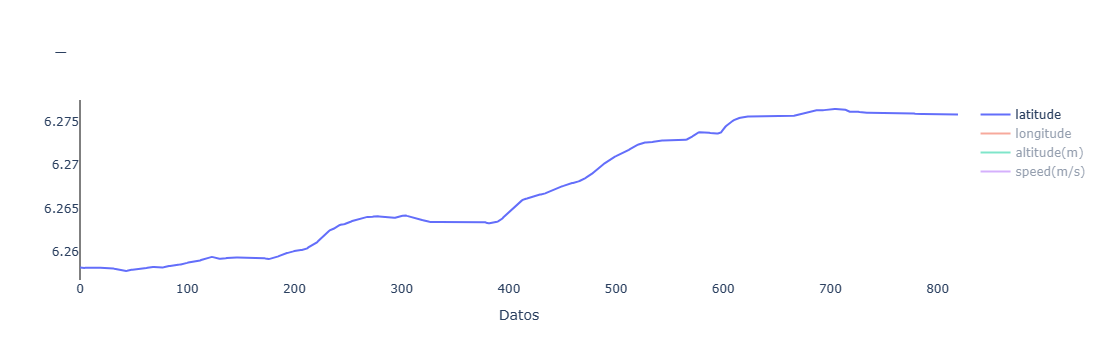

In [90]:
Travel = Travel_3
Travel = Travel.reset_index(drop=True) # Reindexar el DF
Travel["t_s"] = range(len(Travel)) # Crear nueva columna de tiempo 1 s
#GPS altimetria
fig = go.Figure(data=[go.Scatter(y = Travel['latitude'], name = "latitude", mode="lines"),
                      go.Scatter(y = Travel["longitude"], name = "longitude", mode="lines", visible = "legendonly"),
                      go.Scatter(y = Travel["altitude(m)"], name = "altitude(m)", mode="lines", visible = "legendonly"),
                      go.Scatter(y = Travel["speed(m/s)"], name = "speed(m/s)", mode="lines", visible = "legendonly")])

fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='black', title_text="Datos")
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='black', title_text="")
fig.update_layout(height=300, width=700, title_text="_",plot_bgcolor="white")
fig.show()

In [91]:




# Calcula el cambio en el tiempo
Travel['delta_tiempo'] = Travel['t_s'].diff().fillna(0)
# Calcula la distancia recorrida en cada intervalo de tiempo
Travel['distancia'] = Travel['speed(m/s)'] * Travel['delta_tiempo']
# Calcula la distancia acumulada en km
Travel['distancia'] = (Travel['distancia'].cumsum())/1000 # en km

Travel["Altitude_api"] = Travel.apply(lambda row: get_altitude(row["latitude"], row["longitude"]), axis=1)

import pandas as pd

# # Crear un DataFrame con la columna 'Columna_A'
# datos = {'Columna_A': [10, None, 30, None, None, None, 50, None]}
# df = pd.DataFrame(datos)

# Rellenar las celdas vacías con el valor de la celda anterior que contiene un número
Travel['Altitude_api_c'] = Travel['Altitude_api'].fillna(method='ffill')

Altitude_api_c = Travel['Altitude_api_c']


#Filtro S-G
x = np.array(Altitude_api_c)
y = savgol_filter(x,30, 3)
Alt_api_c_f = savgol_filter(y,30, 3)

Travel ["Alt_api_c_f"] = Alt_api_c_f

# Guardar los DFs que contienen la columna Altitud_api

# Travel.to_excel("C:/Users/Lenovo/OneDrive/Documentos/DATOS_VIAJES_MOTOS/Travel_5_" + C +".xlsx", index=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12356\3627183202.py:17: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [92]:
# import pandas as pd

# # # Crear un DataFrame con la columna 'Columna_A'
# # datos = {'Columna_A': [10, None, 30, None, None, None, 50, None]}
# # df = pd.DataFrame(datos)

# # Rellenar las celdas vacías con el valor de la celda anterior que contiene un número
# Travel['Altitude_api_c'] = Travel['Altitude_api'].fillna(method='ffill')

# Altitude_api_c = Travel['Altitude_api_c']


# #Filtro S-G
# x = np.array(Altitude_api_c)
# y = savgol_filter(x,30, 3)
# Alt_api_c_f = savgol_filter(y,30, 3)

# Travel ["Alt_api_c_f"] = Alt_api_c_f

# Guardar los DFs que contienen la columna Altitud_api

# Travel.to_excel("C:/Users/Lenovo/OneDrive/Documentos/DATOS_VIAJES_MOTOS/Travel_1_2" + C +".xlsx", index=False)


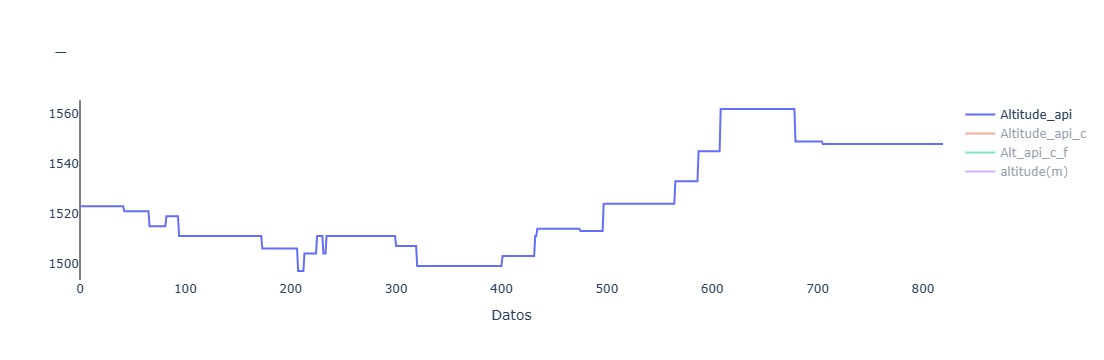

In [93]:
#GPS altimetria
fig = go.Figure(data=[go.Scatter(x = Travel['t_s'], y = Travel['Altitude_api'], name = "Altitude_api", mode="lines"),
                      go.Scatter(x = Travel['t_s'], y = Travel["Altitude_api_c"], name = "Altitude_api_c", mode="lines", visible = "legendonly"),
                      go.Scatter(x = Travel['t_s'], y = Travel["Alt_api_c_f"], name = "Alt_api_c_f", mode="lines", visible = "legendonly"),
                      go.Scatter(x = Travel['t_s'], y = Travel["altitude(m)"], name = "altitude(m)", mode="lines", visible = "legendonly")])

fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='black', title_text="Datos")
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='black', title_text="")
fig.update_layout(height=300, width=700, title_text="_",plot_bgcolor="white")

fig.show()

## OJO correr desde aca despues de importar alturas

In [94]:
# Travel = pd.read_excel ("C:/Users/Lenovo/OneDrive/Documentos/DATOS_VIAJES_MOTOS/Travel_8_1.xlsx")

In [95]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = Travel

#### Creacion de intervalo de distancia fija durante el viaje ####

# Crear una nueva columna para almacenar los números de intervalo
df['N_intervalo_100m'] = -1

# Definir el tamaño del intervalo (140 metros en este caso)
intervalo = 0.1

# Inicializar el contador de intervalos
contador_intervalo = 0
distancia_actual = 0

# Recorrer el DataFrame
for i in range(len(df)):
    # Asignar el número de intervalo actual
    df.loc[i, 'N_intervalo_100m'] = contador_intervalo
    
    # Calcular la distancia al siguiente punto
    distancia_siguiente = df['distancia'][i + 1] if i < len(df) - 1 else df['distancia'][i]
    distancia_actual += distancia_siguiente - df['distancia'][i]
    
    # Verificar si la distancia actual supera el tamaño del intervalo
    if distancia_actual >= intervalo:
        contador_intervalo += 1
        distancia_actual = 0



#### Calculo de la pendiente para el intervalo de distancia fija ####

# Crear una nueva columna para almacenar las pendientes
df['Pendiente_100m'] = np.nan

# Recorrer el DataFrame por cada intervalo
for i in range(df['N_intervalo_100m'].max() + 1):
    # Filtrar los puntos dentro del intervalo actual
    intervalo_actual = df[df['N_intervalo_100m'] == i]
    
    # Si hay al menos dos puntos dentro del intervalo, calcular la pendiente
    if len(intervalo_actual) >= 2:
        x = intervalo_actual.index
        y = intervalo_actual['Alt_api_c_f']
        
        # Ajustar una línea de tendencia (regresión lineal) a los puntos
        coeficientes = np.polyfit(x, y, 1)
        
        # El coeficiente de la pendiente es el primero en la lista de coeficientes
        pendiente = coeficientes[0]
        
        # Almacenar la pendiente en el DataFrame
        df.loc[df['N_intervalo_100m'] == i, 'Pendiente_100m'] = pendiente





#### Calculo de R2 para cada intervalo

# Paso 2: Calcular la pendiente y el R2 para cada segmento
segmentos = df.groupby('N_intervalo_100m')
for _, grupo in segmentos:
    x = grupo['Alt_api_c_f'].values.reshape(-1, 1)
    y = np.arange(len(grupo)).reshape(-1, 1)  # Usamos índices como valores de y
    regresion = LinearRegression().fit(x, y)
    pendiente = regresion.coef_[0][0]
    r2 = r2_score(y, regresion.predict(x))
    # df.loc[grupo.index, 'Pendiente'] = pendiente
    df.loc[grupo.index, 'R2_100m'] = r2

# # Paso 1: Crear una nueva columna para el segmento
# df['Segmento'] = df['N_intervalo_100m'] * 100

# # Paso 2: Calcular la pendiente y el R2 para cada segmento
# segmentos = df.groupby('Segmento')
# for _, grupo in segmentos:
#     x = grupo['Alt_api_c_f'].values.reshape(-1, 1)
#     y = np.arange(len(grupo)).reshape(-1, 1)  # Usamos índices como valores de y
#     regresion = LinearRegression().fit(x, y)
#     pendiente = regresion.coef_[0][0]
#     r2 = r2_score(y, regresion.predict(x))
#     # df.loc[grupo.index, 'Pendiente'] = pendiente
#     df.loc[grupo.index, 'R2'] = r2

# df

In [96]:
#### Creacion de intervalo de distancia fija durante el viaje ####

# Crear una nueva columna para almacenar los números de intervalo
df['N_intervalo_140m'] = -1

# Definir el tamaño del intervalo (140 metros en este caso)
intervalo = 0.14

# Inicializar el contador de intervalos
contador_intervalo = 0
distancia_actual = 0

# Recorrer el DataFrame
for i in range(len(df)):
    # Asignar el número de intervalo actual
    df.loc[i, 'N_intervalo_140m'] = contador_intervalo
    
    # Calcular la distancia al siguiente punto
    distancia_siguiente = df['distancia'][i + 1] if i < len(df) - 1 else df['distancia'][i]
    distancia_actual += distancia_siguiente - df['distancia'][i]
    
    # Verificar si la distancia actual supera el tamaño del intervalo
    if distancia_actual >= intervalo:
        contador_intervalo += 1
        distancia_actual = 0

#### Calculo de la pendiente para el intervalo de distancia fija ####

# Crear una nueva columna para almacenar las pendientes
df['Pendiente_140m'] = np.nan

# Recorrer el DataFrame por cada intervalo
for i in range(df['N_intervalo_140m'].max() + 1):
    # Filtrar los puntos dentro del intervalo actual
    intervalo_actual = df[df['N_intervalo_140m'] == i]
    
    # Si hay al menos dos puntos dentro del intervalo, calcular la pendiente
    if len(intervalo_actual) >= 2:
        x = intervalo_actual.index
        y = intervalo_actual['Alt_api_c_f']
        
        # Ajustar una línea de tendencia (regresión lineal) a los puntos
        coeficientes = np.polyfit(x, y, 1)
        
        # El coeficiente de la pendiente es el primero en la lista de coeficientes
        pendiente = coeficientes[0]
        
        # Almacenar la pendiente en el DataFrame
        df.loc[df['N_intervalo_140m'] == i, 'Pendiente_140m'] = pendiente




#### Calculo de R2 para cada intervalo

# Paso 2: Calcular la pendiente y el R2 para cada segmento
segmentos = df.groupby('N_intervalo_140m')
for _, grupo in segmentos:
    x = grupo['Alt_api_c_f'].values.reshape(-1, 1)
    y = np.arange(len(grupo)).reshape(-1, 1)  # Usamos índices como valores de y
    regresion = LinearRegression().fit(x, y)
    pendiente = regresion.coef_[0][0]
    r2 = r2_score(y, regresion.predict(x))
    # df.loc[grupo.index, 'Pendiente'] = pendiente
    df.loc[grupo.index, 'R2_140m'] = r2


In [97]:

#### Creacion de intervalo de distancia fija durante el viaje ####

# Crear una nueva columna para almacenar los números de intervalo
df['N_intervalo_160m'] = -1

# Definir el tamaño del intervalo (140 metros en este caso)
intervalo = 0.16

# Inicializar el contador de intervalos
contador_intervalo = 0
distancia_actual = 0

# Recorrer el DataFrame
for i in range(len(df)):
    # Asignar el número de intervalo actual
    df.loc[i, 'N_intervalo_160m'] = contador_intervalo
    
    # Calcular la distancia al siguiente punto
    distancia_siguiente = df['distancia'][i + 1] if i < len(df) - 1 else df['distancia'][i]
    distancia_actual += distancia_siguiente - df['distancia'][i]
    
    # Verificar si la distancia actual supera el tamaño del intervalo
    if distancia_actual >= intervalo:
        contador_intervalo += 1
        distancia_actual = 0

#### Calculo de la pendiente para el intervalo de distancia fija ####

# Crear una nueva columna para almacenar las pendientes
df['Pendiente_160m'] = np.nan

# Recorrer el DataFrame por cada intervalo
for i in range(df['N_intervalo_160m'].max() + 1):
    # Filtrar los puntos dentro del intervalo actual
    intervalo_actual = df[df['N_intervalo_160m'] == i]
    
    # Si hay al menos dos puntos dentro del intervalo, calcular la pendiente
    if len(intervalo_actual) >= 2:
        x = intervalo_actual.index
        y = intervalo_actual['Alt_api_c_f']
        
        # Ajustar una línea de tendencia (regresión lineal) a los puntos
        coeficientes = np.polyfit(x, y, 1)
        
        # El coeficiente de la pendiente es el primero en la lista de coeficientes
        pendiente = coeficientes[0]
        
        # Almacenar la pendiente en el DataFrame
        df.loc[df['N_intervalo_160m'] == i, 'Pendiente_160m'] = pendiente

#### Calculo de R2 para cada intervalo

# Paso 2: Calcular la pendiente y el R2 para cada segmento
segmentos = df.groupby('N_intervalo_160m')
for _, grupo in segmentos:
    x = grupo['Alt_api_c_f'].values.reshape(-1, 1)
    y = np.arange(len(grupo)).reshape(-1, 1)  # Usamos índices como valores de y
    regresion = LinearRegression().fit(x, y)
    pendiente = regresion.coef_[0][0]
    r2 = r2_score(y, regresion.predict(x))
    # df.loc[grupo.index, 'Pendiente'] = pendiente
    df.loc[grupo.index, 'R2_160m'] = r2



In [98]:
#### Creacion de intervalo de distancia fija durante el viaje ####

# Crear una nueva columna para almacenar los números de intervalo
df['N_intervalo_200m'] = -1

# Definir el tamaño del intervalo (140 metros en este caso)
intervalo = 0.2

# Inicializar el contador de intervalos
contador_intervalo = 0
distancia_actual = 0

# Recorrer el DataFrame
for i in range(len(df)):
    # Asignar el número de intervalo actual
    df.loc[i, 'N_intervalo_200m'] = contador_intervalo
    
    # Calcular la distancia al siguiente punto
    distancia_siguiente = df['distancia'][i + 1] if i < len(df) - 1 else df['distancia'][i]
    distancia_actual += distancia_siguiente - df['distancia'][i]
    
    # Verificar si la distancia actual supera el tamaño del intervalo
    if distancia_actual >= intervalo:
        contador_intervalo += 1
        distancia_actual = 0


#### Calculo de la pendiente para el intervalo de distancia fija ####


# Crear una nueva columna para almacenar las pendientes
df['Pendiente_200m'] = np.nan

# Recorrer el DataFrame por cada intervalo
for i in range(df['N_intervalo_200m'].max() + 1):
    # Filtrar los puntos dentro del intervalo actual
    intervalo_actual = df[df['N_intervalo_200m'] == i]
    
    # Si hay al menos dos puntos dentro del intervalo, calcular la pendiente
    if len(intervalo_actual) >= 2:
        x = intervalo_actual.index
        y = intervalo_actual['Alt_api_c_f']
        
        # Ajustar una línea de tendencia (regresión lineal) a los puntos
        coeficientes = np.polyfit(x, y, 1)
        
        # El coeficiente de la pendiente es el primero en la lista de coeficientes
        pendiente = coeficientes[0]
        
        # Almacenar la pendiente en el DataFrame
        df.loc[df['N_intervalo_200m'] == i, 'Pendiente_200m'] = pendiente

#### Calculo de R2 para cada intervalo

# Paso 2: Calcular la pendiente y el R2 para cada segmento
segmentos = df.groupby('N_intervalo_200m')
for _, grupo in segmentos:
    x = grupo['Alt_api_c_f'].values.reshape(-1, 1)
    y = np.arange(len(grupo)).reshape(-1, 1)  # Usamos índices como valores de y
    regresion = LinearRegression().fit(x, y)
    pendiente = regresion.coef_[0][0]
    r2 = r2_score(y, regresion.predict(x))
    # df.loc[grupo.index, 'Pendiente'] = pendiente
    df.loc[grupo.index, 'R2_200m'] = r2

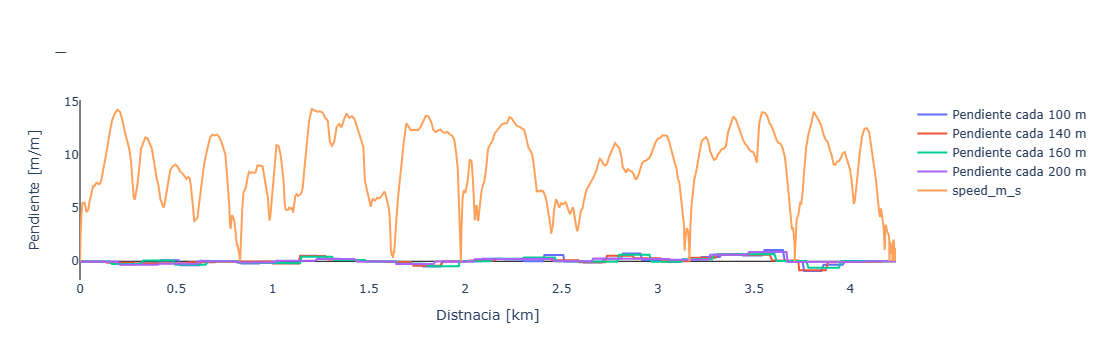

In [99]:
#GPS altimetria
fig = go.Figure(data=[go.Scatter(x = df['distancia'], y = df['Pendiente_100m'], name = "Pendiente cada 100 m", mode="lines"),
                      go.Scatter(x = Travel['distancia'], y = Travel["Pendiente_140m"], name = "Pendiente cada 140 m", mode="lines", visible = "legendonly"),
                      go.Scatter(x = Travel['distancia'], y = Travel["Pendiente_160m"], name = "Pendiente cada 160 m", mode="lines", visible = "legendonly"),
                      go.Scatter(x = Travel['distancia'], y = Travel["Pendiente_200m"], name = "Pendiente cada 200 m", mode="lines", visible = "legendonly"),
                      go.Scatter(x = Travel['distancia'], y = Travel["speed(m/s)"], name = "speed_m_s", mode="lines", visible = "legendonly")])

fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='black', title_text="Distnacia [km]")
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='black', title_text="Pendiente [m/m]")
fig.update_layout(height=300, width=700, title_text="_",plot_bgcolor="white")

fig.show()

In [100]:
Travel.to_excel("C:/Users/Lenovo/OneDrive/Documentos/DATOS_VIAJES_MOTOS/Travel_3_26.xlsx", index=False)